<a href="https://colab.research.google.com/github/TitoArellano/Proyecto_CH_III_Ciencia_de_datos_/blob/main/Copia_de_Proyecto_CH_III_Ciencia_de_datos_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Clasificación de ataques cardiaco en jóvenes y adultos en Sudáfrica**

## Las enfermedades cardiovasculares representan una grave amenaza para la salud pública en Sudáfrica, con un promedio de 210 muertes diarias. Un factor clave que contribuye a esta crisis es la falta de concienciación, lo que impide que muchas personas sean diagnosticadas y tratadas a tiempo. La Dra. Liesl Zühlke, cardióloga pediátrica y presidenta de la Asociación Cardíaca Sudafricana, ha destacado estos desafíos en una entrevista con The Conversation Africa. Su análisis pone de relieve la urgencia de mejorar la educación sobre la salud cardiovascular y fortalecer los sistemas de detección y atención médica para reducir la mortalidad asociada a estas enfermedades.

## **Audiencia:** El estudio este realizado para la comunidad médica mundial, con el fin de tomar cartas en el asunto y como poder prevenir o crear conciencia de las enfermedades cardiacas que han ido en aumento del país Sudafricano.

## El DataSet contiene detalles demográficos, historial médico, estilo de vida y hábitos para evaluar los resultados si es un paciente potencial para sufrir algún ataque Cardiaco.

## Variable Objetivo: **Resultado de Ataque Cardiaco**: se identifica como binaria donde; 0 = NO y 1 = SI.


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics

In [123]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Proyecto_ML_CD_II_HAP/heart_attack_south_africa.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**COPIA DE DATA SET ORIGNAL**
* Se respalda el dataset original, generaldo la copia con la cual se va a trabajar.

In [124]:
data_clean = df.copy()

# **Resumen de Metadata**

In [125]:
data_clean.shape
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  object 
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  object 
 11  Family_History_Heart_Disease  100000 non-null  object 
 12  Diet_Quality                  100000 non-null

## **Clasificación de variables**
* Patient_ID - ID del paciente
* Age - Edad
* Gender - Género
* Cholesterol_Level - Nivel de colesterol
* Blood_Pressure_Systolic - Presión arterial sistólica
* Blood_Pressure_Diastolic - Presión arterial diastólica
* Smoking_Status - Estado de fumar
* Alcohol_Intake - Ingesta de alcohol
* Physical_Activity - Actividad física
* Obesity_Index - Índice de obesidad
* Diabetes_Status - Estado de diabetes
* Family_History_Heart_Disease - Antecedentes familiares de enfermedades cardíacas
* Diet_Quality - Calidad de la dieta
* Stress_Level - Nivel de estrés
* Heart_Attack_History - Historia de ataque cardíaco
* Medication_Usage - Uso de medicamentos
* Triglycerides_Level - Nivel de triglicéridos
* LDL_Level - Nivel de LDL
* HDL_Level - Nivel HDL
* Heart_Attack_Outcome - Resultado del ataque cardíaco




In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Age,100000.0,56.929210,18.776713,25.0,41.00,57.0,73.00,89.0
Cholesterol_Level,100000.0,224.578740,43.316257,150.0,187.00,225.0,262.00,299.0
Blood_Pressure_Systolic,100000.0,144.317750,31.759636,90.0,117.00,144.0,172.00,199.0
Blood_Pressure_Diastolic,100000.0,89.591950,17.277238,60.0,75.00,90.0,105.00,119.0
Obesity_Index,100000.0,29.004788,6.343317,18.0,23.50,29.0,34.50,40.0
Triglycerides_Level,100000.0,174.629860,72.118654,50.0,112.00,175.0,237.00,299.0
LDL_Level,100000.0,124.333400,43.340624,50.0,87.00,124.0,162.00,199.0
HDL_Level,100000.0,49.547090,17.350927,20.0,35.00,50.0,65.00,79.0
Heart_Attack_Outcome,100000.0,0.587320,0.492319,0.0,0.00,1.0,1.00,1.0


# **Revisión de Registros *Nulos***
* Se revisan los registros duplicados en el Dataset original.
* Se revisan los registros nulos contenidos en el Dataset de origen.
* Se genera grafica para revisión de columnas "Null".


In [127]:
df.duplicated().sum()

np.int64(0)

**REVISION DE DATOS**
* El DataSet no cuenta con registros duplicados.
* El Data set no cuenta con registros nulos.

Podemos inferir que el Dataset proporcionado, se encuentra "limpio" eso quiere decir que no tendremos que limpiar registros null o Duplicados.
Nos permitirá un correcto análisis para determinar algunos insight a continuación.


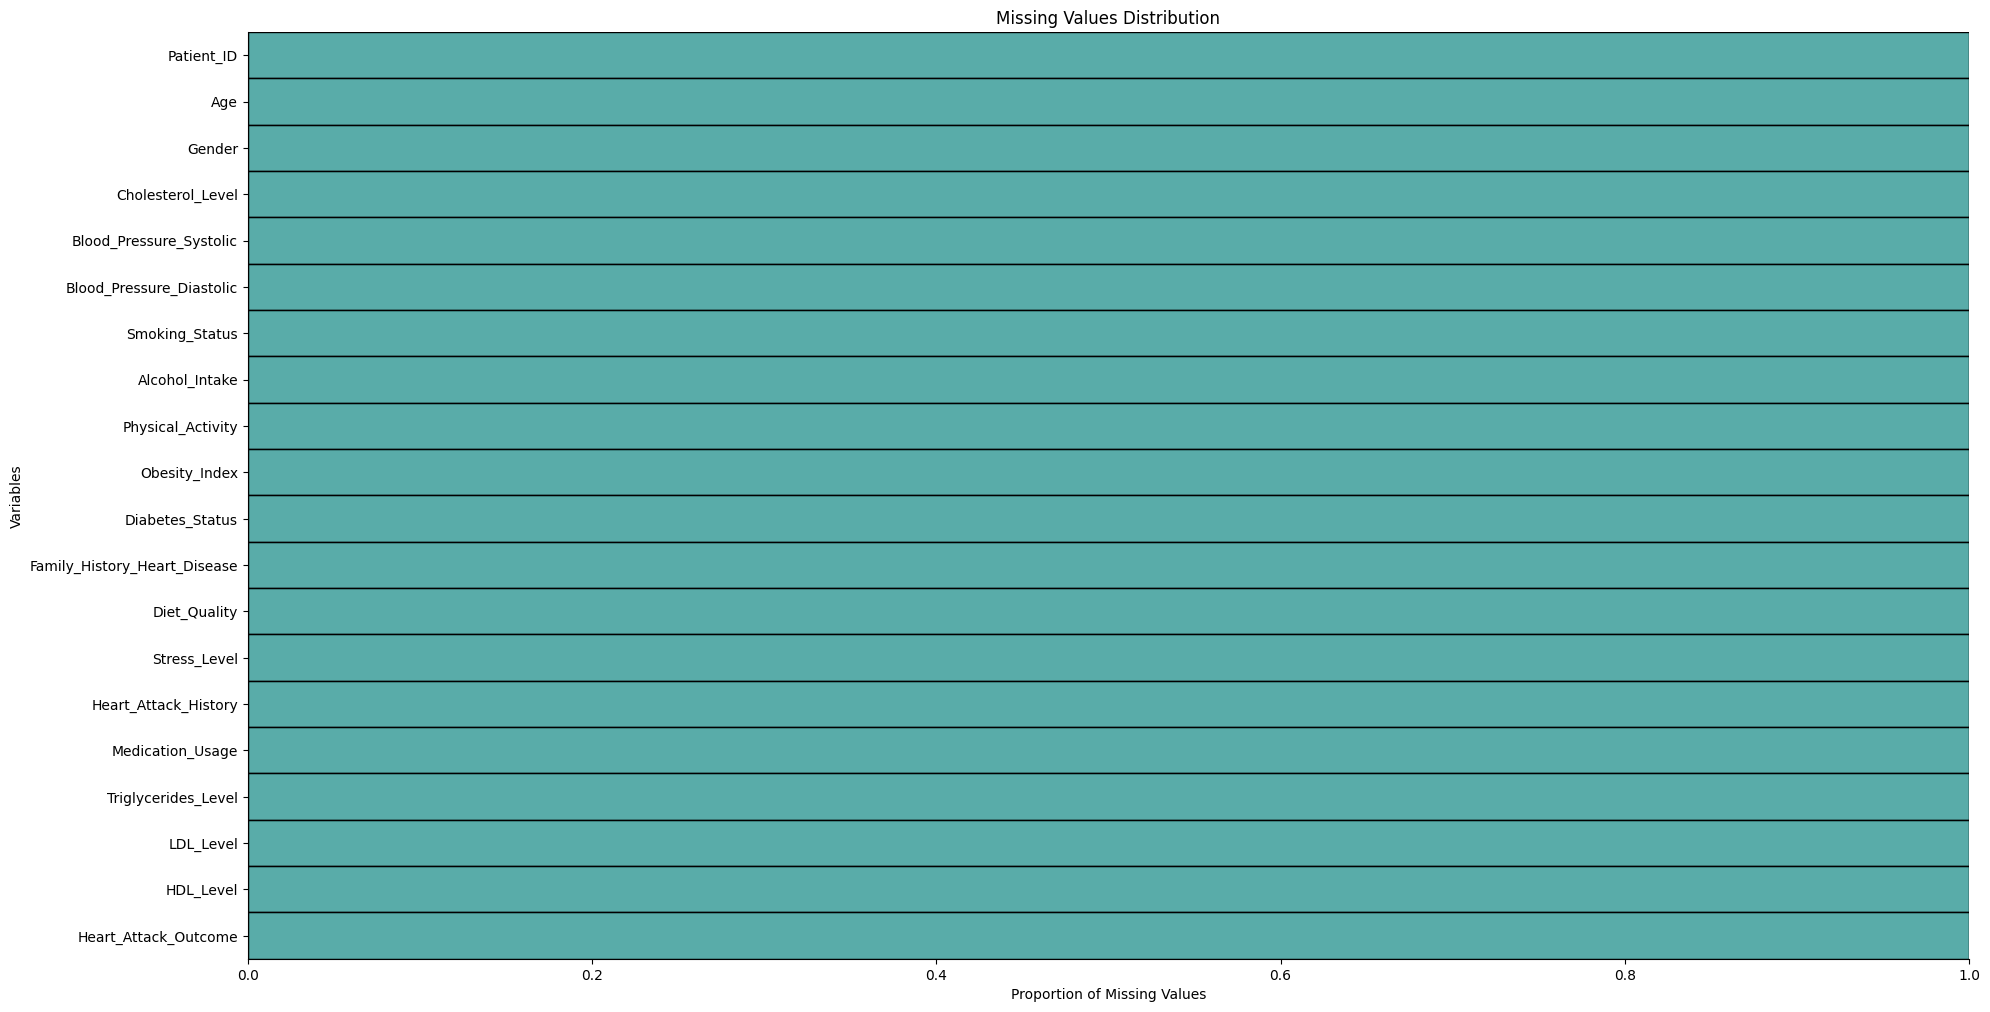

In [128]:
(df := df.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,
            height=10,
            palette='viridis',
            legend=False
        )
    )
)


plt.title('Missing Values Distribution')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Variables')
plt.show()

#**Normalzación y Tipos de Datos**
* Se normalizan los datos contenidos en el dataframe, con la finalidad de analizar de mejor manera los *insight*
* 'Smoking_Status' = de *object* a *int64*
* 'Diabetes_Status' = de *object* a *int64*
* 'Heart_Attack_History' = de *object* a *int64*
* 'Medication_Usage' = de *object* a *int64*
* 'Family_History_Heart_Disease' = de *object* a *int64*

In [129]:
data_clean['Smoking_Status'] = data_clean['Smoking_Status'].replace({'Yes': 1, 'No': 0})
data_clean['Diabetes_Status'] = data_clean['Diabetes_Status'].replace({'Yes': 1, 'No': 0})
data_clean['Heart_Attack_History'] = data_clean['Heart_Attack_History'].replace({'Yes': 1, 'No': 0})
data_clean['Medication_Usage'] = data_clean['Medication_Usage'].replace({'Yes': 1, 'No': 0})
data_clean['Family_History_Heart_Disease'] = data_clean['Family_History_Heart_Disease'].replace({'Yes': 1, 'No': 0})

<ipython-input-129-b1fb3e05b07e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Smoking_Status'] = data_clean['Smoking_Status'].replace({'Yes': 1, 'No': 0})
<ipython-input-129-b1fb3e05b07e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Diabetes_Status'] = data_clean['Diabetes_Status'].replace({'Yes': 1, 'No': 0})
<ipython-input-129-b1fb3e05b07e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.

In [130]:
data_clean.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,0,High,Sedentary,35.2,0,0,Good,High,0,0,264,141,65,0
1,2,39,Female,160,185,88,0,Low,Sedentary,21.3,0,0,Average,Medium,0,1,150,81,42,0
2,3,85,Male,254,173,113,1,Moderate,Highly Active,32.0,1,0,Good,Low,0,0,220,124,70,1
3,4,45,Female,261,187,65,0,High,Sedentary,36.4,0,1,Average,Low,0,1,141,56,38,1
4,5,48,Male,206,189,84,0,Low,Active,26.6,0,0,Good,High,0,0,221,186,26,0


# **Visualización de variables a analizar del Dataset**
## **Preguntas e hipótesis**
# 1.- ¿Quiénes son más propensos a padecer un ataque cardiaco (M o F)?
# 2.- ¿A qué edad se frecuentan la enfermedad cardiaca?
# 3.- ¿Se relaciona la obesidad con la enfermedad?
# 4.- ¿Cuánto influye la actividad física en la prevención de la enfermedad?


In [131]:
#Pairplot
#sns.pairplot(data_clean, vars=['Age', 'Cholesterol_Level', 'Smoking_Status', 'Smoking_Status',	'Obesity_Index','Diabetes_Status', 'Family_History_Heart_Disease', 'Heart_Attack_History', 'Medication_Usage','Triglycerides_Level' ], hue='Heart_Attack_Outcome', palette='viridis',height=2.5) #'viridis'
#plt.show()

# 1.- En la metadata, podemos visualizar que tanto la cantidad de Mujeres y Hombres están igualados en aquellos que padecen o no algún ataque cardiaco.  

In [132]:
print("Total de Registros por genero:")
gender_counts = data_clean['Gender'].value_counts()
for gender, count in gender_counts.items():
    print(f"Género: {gender}, Registros: {count}")

print("-----------------------------------------------------------------")

print("Total de Registros por genero que presentaron un ataque cardiaco:")
df_with_attack = data_clean[data_clean['Heart_Attack_Outcome'] == 'Sí']
gender_counts = df_with_attack['Gender'].value_counts()
for gender, count in gender_counts.items():
    print(f"Género: {gender}, Registros: {count}")

Total de Registros por genero:
Género: Female, Registros: 50180
Género: Male, Registros: 49820
-----------------------------------------------------------------
Total de Registros por genero que presentaron un ataque cardiaco:


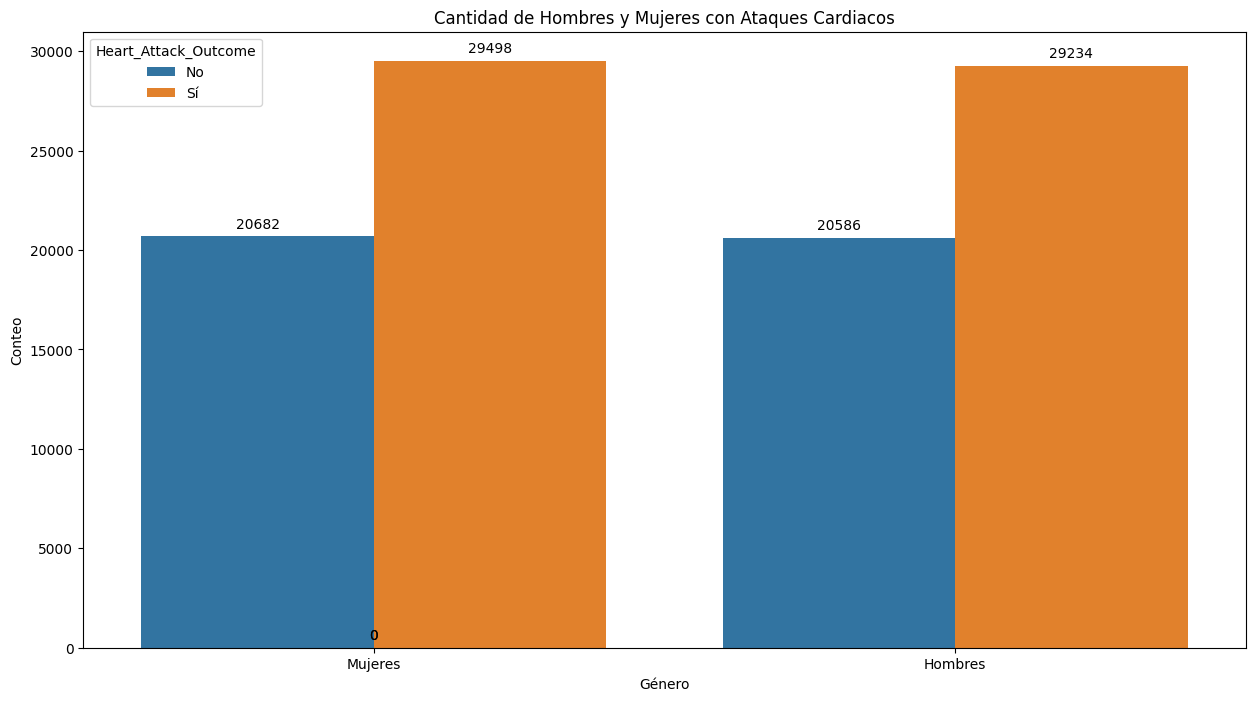

In [133]:
data_clean['Heart_Attack_Outcome'] = data_clean['Heart_Attack_Outcome'].map({1: 'Sí', 0: 'No'})
data_clean['Gender'] = data_clean['Gender'].map({'Male': 'Hombres', 'Female': 'Mujeres'})
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Gender', hue='Heart_Attack_Outcome', data=data_clean, palette='tab10') #
plt.title('Cantidad de Hombres y Mujeres con Ataques Cardiacos')
plt.xlabel('Género')
plt.ylabel('Conteo')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

# 2.- La grafica nos representa el comportamiento de ambos géneros según su edad, la que, al revisar los antecedentes, los datos son muy similares sin hacer distinción entre hombres y mujeres. también podemos observar que a contar de 61 año son más propensos de sufrir un ataque cardiaco. *insights:* Revisaremos si corresponde a la poca actividad física cuando llegamos a la tercera edad.


In [134]:
df_with_hd = data_clean[data_clean['Heart_Attack_Outcome'] == 'Sí']
age_counts = df_with_hd['Age'].value_counts().sort_index()
for age, count in age_counts.items():
    print(f"Edad {age}: Registros {count}")

Edad 25: Registros 659
Edad 26: Registros 692
Edad 27: Registros 679
Edad 28: Registros 670
Edad 29: Registros 642
Edad 30: Registros 703
Edad 31: Registros 660
Edad 32: Registros 638
Edad 33: Registros 665
Edad 34: Registros 658
Edad 35: Registros 702
Edad 36: Registros 693
Edad 37: Registros 711
Edad 38: Registros 658
Edad 39: Registros 699
Edad 40: Registros 677
Edad 41: Registros 717
Edad 42: Registros 662
Edad 43: Registros 704
Edad 44: Registros 629
Edad 45: Registros 695
Edad 46: Registros 653
Edad 47: Registros 687
Edad 48: Registros 628
Edad 49: Registros 623
Edad 50: Registros 672
Edad 51: Registros 692
Edad 52: Registros 682
Edad 53: Registros 676
Edad 54: Registros 677
Edad 55: Registros 651
Edad 56: Registros 664
Edad 57: Registros 641
Edad 58: Registros 636
Edad 59: Registros 678
Edad 60: Registros 700
Edad 61: Registros 1153
Edad 62: Registros 1198
Edad 63: Registros 1154
Edad 64: Registros 1142
Edad 65: Registros 1160
Edad 66: Registros 1178
Edad 67: Registros 1180
Edad

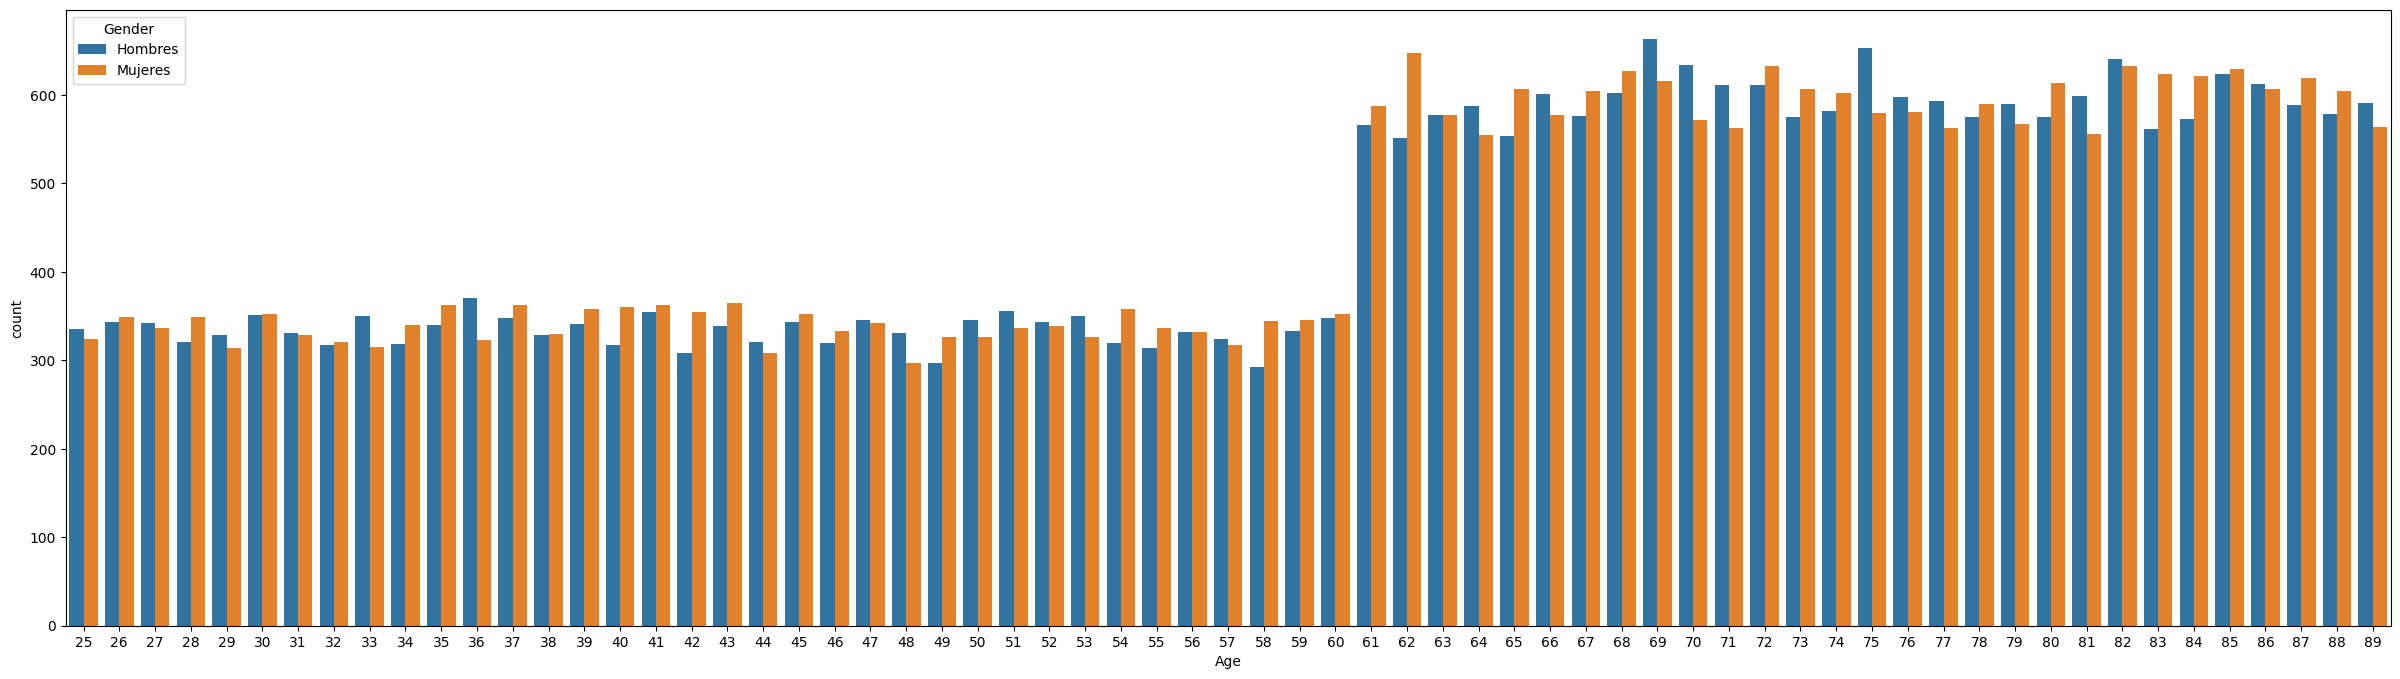

In [135]:
df_clean_grafic = data_clean[data_clean['Heart_Attack_Outcome'] == 'Sí']
plt.figure(figsize=(30, 8))
ax = sns.countplot(x='Age', hue='Gender', data=df_clean_grafic, palette='tab10')


# 3.- Podemos observar que el índice influye de manera gradual según la edad. En la gráfica podemos revisar que aquellos que cuentan con mayor índice son más propensos a sufrir un ataque, el riesgo aumenta a medida que avanzan los años.

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


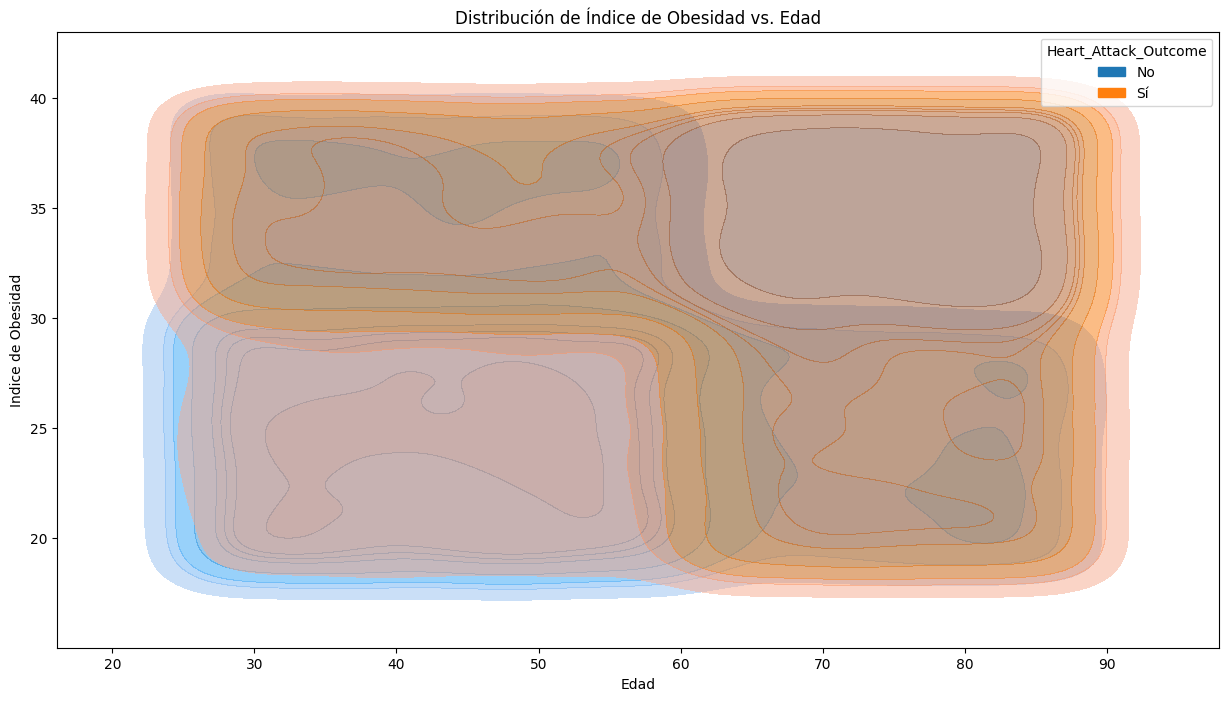

In [136]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=data_clean, x='Age', y='Obesity_Index', hue='Heart_Attack_Outcome', fill=True, cmap='inferno', alpha=0.5)
plt.title('Distribución de Índice de Obesidad vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Indice de Obesidad')
plt.show()

# 4.- Para el análisis de la actividad física y la relación con los ataques cardiacos:
---
1.   Para aquellos que están altamente activos, el riesgo se reduce en un 11% de la metadata analizada. por lo tanto, si cuenta con una alta actividad física, es menos propenso a sufrir un ataque cardiaco.
2.   Para aquellos que son activos, aproximadamente el riesgo es del 17% de la población.
3. Para aquellos que son sedentarios, el riesgo aumenta en aprox 30% de la metadata analizada.





In [137]:
print("Total de Registros por genero:")
active_counts = data_clean['Physical_Activity'].value_counts()
for Physical_Activity, count in active_counts.items():
    print(f"Género: {Physical_Activity}, Registros: {count}")

print("-----------------------------------------------------------------")

print("Total de Registros por genero que presentaron un ataque cardiaco:")
active_df_with_attack = data_clean[data_clean['Heart_Attack_Outcome'] == 'Sí']
active_counts = active_df_with_attack['Physical_Activity'].value_counts()
for gender, count in active_counts.items():
    print(f"Género: {gender}, Registros: {count}")

Total de Registros por genero:
Género: Sedentary, Registros: 50275
Género: Active, Registros: 29810
Género: Highly Active, Registros: 19915
-----------------------------------------------------------------
Total de Registros por genero que presentaron un ataque cardiaco:
Género: Sedentary, Registros: 29593
Género: Active, Registros: 17492
Género: Highly Active, Registros: 11647


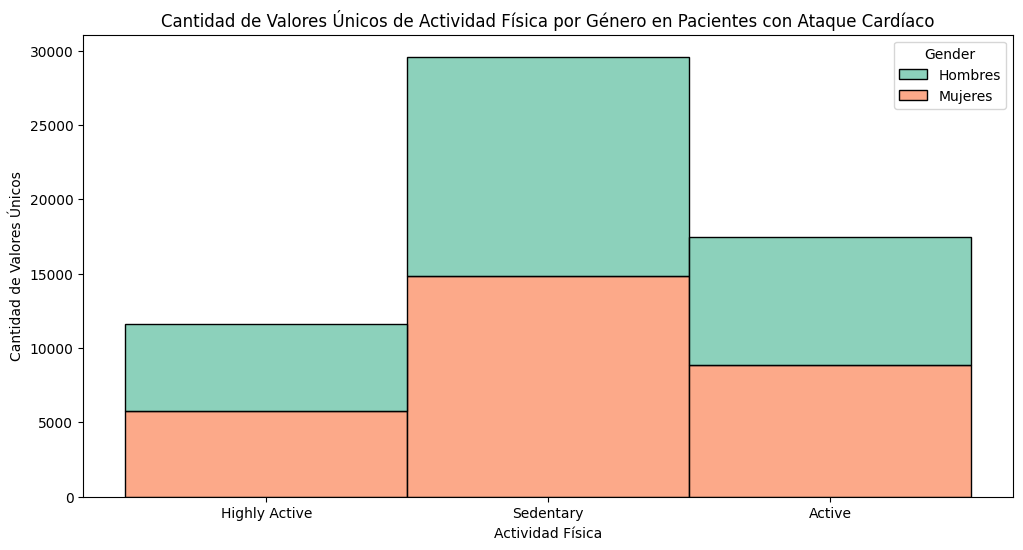

In [138]:
data_filtered = data_clean[data_clean['Heart_Attack_Outcome'] == 'Sí']
plt.figure(figsize=(12, 6))
sns.histplot(data=data_filtered, x='Physical_Activity', hue='Gender', multiple='stack', stat='count', palette='Set2')
plt.title('Cantidad de Valores Únicos de Actividad Física por Género en Pacientes con Ataque Cardíaco')
plt.xlabel('Actividad Física')
plt.ylabel('Cantidad de Valores Únicos')
plt.show()

# Parte II - Entrega final proyecto de ML.
## Exportamos la siguientes librerias, contenidas en Sklearn
 * train_test_split
 * RandomForestClassifier
 * accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [140]:
data_clean.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Mujeres,156,94,79,0,High,Sedentary,35.2,0,0,Good,High,0,0,264,141,65,No
1,2,39,Mujeres,160,185,88,0,Low,Sedentary,21.3,0,0,Average,Medium,0,1,150,81,42,No
2,3,85,Hombres,254,173,113,1,Moderate,Highly Active,32.0,1,0,Good,Low,0,0,220,124,70,Sí
3,4,45,Mujeres,261,187,65,0,High,Sedentary,36.4,0,1,Average,Low,0,1,141,56,38,Sí
4,5,48,Hombres,206,189,84,0,Low,Active,26.6,0,0,Good,High,0,0,221,186,26,No


# Transformación de variables categoricas a numericas.
* Esta transformación nos permitira mejorar el modelo , utilizaremos One-hot Encoding y que las columnas que creamos sean de tipo "INT" dejandolas binarias

In [141]:
columnas_categoricas = ['Gender', 'Alcohol_Intake', 'Physical_Activity', 'Diet_Quality', 'Stress_Level']
df_encoded = pd.get_dummies(data_clean, columns=columnas_categoricas)
df_encoded = df_encoded.astype({col: int for col in df_encoded.columns if set(df_encoded[col].unique()).issubset({0, 1})})

In [142]:
df_encoded['Heart_Attack_Outcome_encoded'] = df_encoded['Heart_Attack_Outcome'].map({'Sí': 1, 'No': 0}).astype(int)

# Dividamos el dataset para entrenar un modelo de Clasificación
* Pasamos a dividir el data set en x_train, x_test, y_train, y_test
* Esto nos ayudará a revisar si nuestro data de testeo esta correctamente clasificada con nuestro modelo de entrenamiento.
* El data set se divide en un 80% (train) / 20% (test).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = df_encoded['Heart_Attack_Outcome_encoded']
X = df_encoded.drop(columns=['Heart_Attack_Outcome', 'Heart_Attack_Outcome_encoded'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Resultado de la evaluación del modelo.
* Accuracy: 1.0 : Esto nos indica qeu el modelo acerto correctamente al 100% de las predicciones en los datos de prueba, suena genial, pero nos puede indicar problemas.
* El modelo esta sobre entrenado generando "Overfitting"
* Existencia de fuga de información, la que nos puede indicar que los datos de resultados se encuentran dentro de una variable.
* La Validación Cruzada, nos entrega que los datos son similares, con una certeza de predicción del 99.999% entre con el Accuracy.

In [148]:
# Evaluacion del modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

🔍 Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8254
           1       1.00      1.00      1.00     11746

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

🧱 Matriz de Confusión:
 [[ 8254     0]
 [    0 11746]]


In [149]:
# Vallidación cruzada
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n📊 Cross-Validation Scores:", scores)
print("📈 Accuracy promedio:", scores.mean())


📊 Cross-Validation Scores: [0.9987  0.99995 1.      1.      0.9999 ]
📈 Accuracy promedio: 0.99971


# Grafica de variables mas importantes del modelo:
* El grafico nos representa que el indice de obesidad, la edad y el nivel de colesterol alto, son las variables que son mas propensas a que estas nos genere un ataque cardiaco.

<ipython-input-150-85c791685d02>:12: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


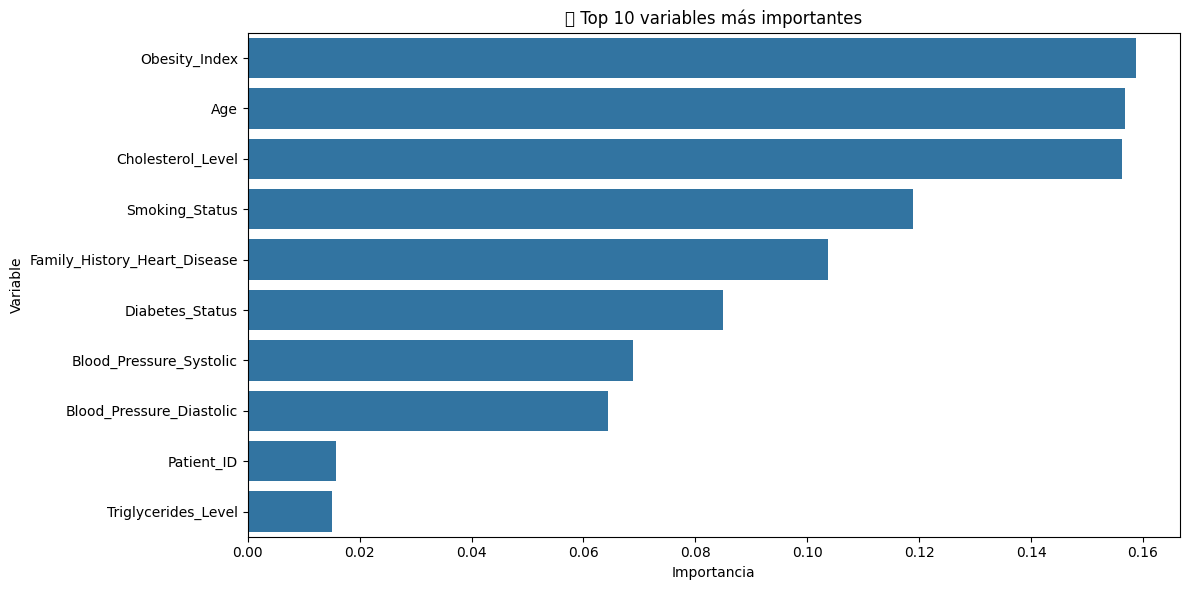

In [150]:
# grafica de la importancia de las variables del modelo.
import matplotlib.pyplot as plt
import seaborn as sns

importancias = model.feature_importances_
importancia_df = pd.Series(importancias, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importancia_df.values[:10], y=importancia_df.index[:10])
plt.title("🎯 Top 10 variables más importantes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Gráfica Matriz de Confusión

<ipython-input-151-3bfea81469f8>:15: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


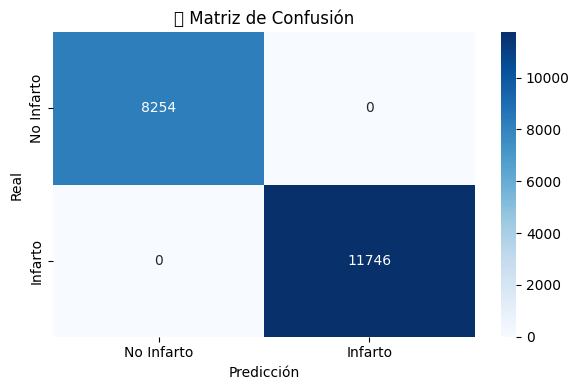

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Infarto', 'Infarto'], yticklabels=['No Infarto', 'Infarto'])
plt.title('🧱 Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


# Grafica de la Curva de ROC

<ipython-input-152-a743e95caa19>:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


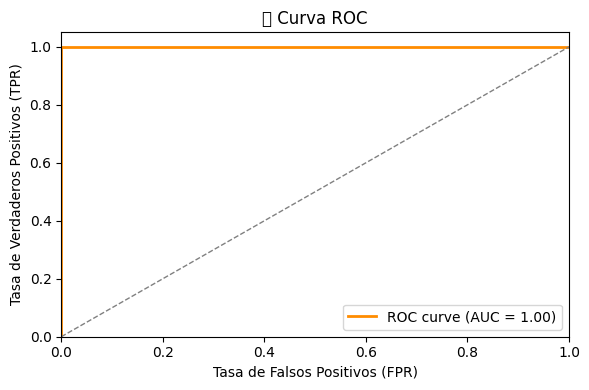

In [152]:

from sklearn.metrics import roc_curve, auc

# Predecir probabilidades en lugar de clases
y_probs = model.predict_proba(X_test)[:, 1]

# Calculo de ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# Validacion de variables de correlación.
* Podemos revisar que la variable de la clase "Heart_Attack_Outcome_encoded" se encuentra de las relacionadas, es por esta razon que el modelo nos entrega un resultado de predicción del 100%.
* Por Otra parte la vriable categorica se divide en 1 (Sí) = 58,73% y 0 (No) = 41.27%

In [153]:
correlaciones = df_encoded.corr(numeric_only=True)['Heart_Attack_Outcome_encoded'].sort_values(ascending=False)
print(correlaciones.head(10))

Heart_Attack_Outcome_encoded    1.000000
Smoking_Status                  0.299025
Age                             0.298683
Obesity_Index                   0.296385
Cholesterol_Level               0.283860
Family_History_Heart_Disease    0.278858
Diabetes_Status                 0.250756
Blood_Pressure_Systolic         0.148573
Blood_Pressure_Diastolic        0.140187
Medication_Usage                0.005468
Name: Heart_Attack_Outcome_encoded, dtype: float64


In [156]:
print(y.value_counts(normalize=True))

Heart_Attack_Outcome_encoded
1    0.58732
0    0.41268
Name: proportion, dtype: float64


# Validación de Modelo KNN
* Crearemos escalamientos de variables para que no se vean afectado por sus diferentes magnitudes.
* Los resultados se entrenan con un KNeighborsClassifier = 5
* En los resultados, podemos visualizar que la matriz de confusión mejora considerablemten en realacion al modelo de clasificación. el Accuracy pasa a un 81%.
* En su validación cruzada, no indica que esta se encuentra en un Accuracy promedio de  80.39%

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

🔍 Accuracy: 0.80755

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      8254
           1       0.85      0.82      0.83     11746

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000

🧱 Matriz de Confusión:
 [[6564 1690]
 [2159 9587]]
📊 Cross-Validation Scores: [0.79815 0.80715 0.8152  0.808   0.79085]
📈 Accuracy promedio: 0.8038700000000001


<ipython-input-162-6acc56907225>:36: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


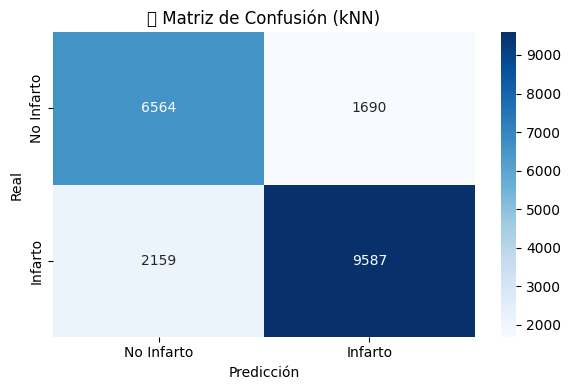

<ipython-input-162-6acc56907225>:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


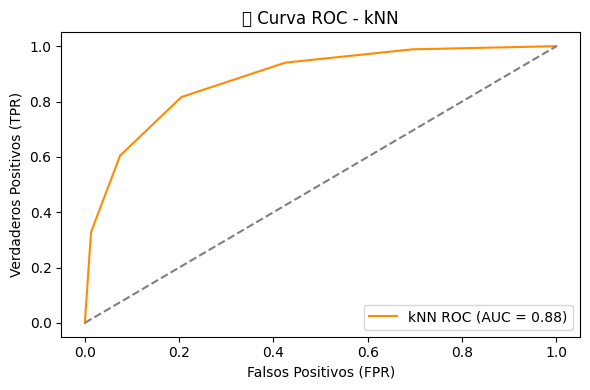

KNeighborsClassifier(n_neighbors=3)

In [162]:
X = df_encoded.drop(columns=['Heart_Attack_Outcome', 'Heart_Attack_Outcome_encoded'])
y = df_encoded['Heart_Attack_Outcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# pipeline con escalamiento + kNN
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

# Entrenar el modelo
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print("📊 Cross-Validation Scores:", scores)
print("📈 Accuracy promedio:", scores.mean())

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Infarto', 'Infarto'], yticklabels=['No Infarto', 'Infarto'])
plt.title('🧱 Matriz de Confusión (kNN)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

y_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # clase 1

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'kNN ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - kNN')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

KNeighborsClassifier(n_neighbors=3)

# Validación de los vecinos cercanos:
* Se crea gráfica en representación de como mejora nuestra modelo con los distintos valores de nuestros "k".
* A mayor "k" nuestro modelo mejora considerablemente.
* Con el rango de k=19, se otiene mejor resultado llegando a un Accuracy de 84% aprox como lo muestra el gráfico.

<ipython-input-163-27e1d0066efd>:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


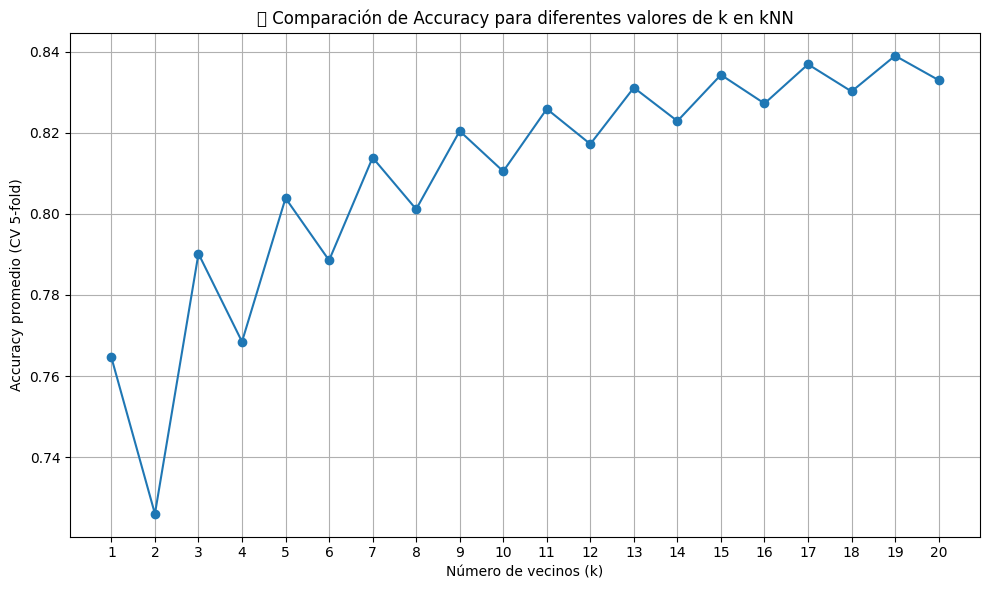

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Rango de valores de k
k_values = list(range(1, 21))
cv_scores = []

# cada valor de k con validación cruzada
for k in k_values:
    knn_pipeline = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=k)
    )
    # Calcular accuracy con validación cruzada
    scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy promedio (CV 5-fold)')
plt.title('📊 Comparación de Accuracy para diferentes valores de k en kNN')
plt.grid(True)
plt.tight_layout()
plt.show()


# Revisando los resultados y que podemos concluir:
* Esta parte del analisis y diasnostico, nos permite visualizar el comportamiento del modelo kNN oara diferentes evetnos (Valores de k) y los vecinos cercanos que se consideran para predecir la clase de nuevos datos.
* Se elijen valores entre 1 y 20 en donde el parametro de k de vecinos, nos muestra que:
* A mayor cantidad de vecinos cercanos, el modelo tienen un mejor modelo de predicción, esto logrando un mejor balance entre la preceisión y la simplicidad del modelo.
* Tambien nos permite tomar una mejor decision sobre cual k debemos utilizzar en el modelo.

# CONCLUSIONES
* Podemos determinar que el mejor modelo de predicción es KNN, la que nos permite tener mejor precisión del modelo, mas aun donde podemos tener un indicadpr de vecinos cercanos que nos permite tener un mejor accuracy del modelo, tal como lo representa la grafica antes realizadas.
##  Podemos decir, dado el caso de los ataques cardiacos en la poblacion sudafricanaque, que tenemos un modelo que nos permitira disgnosticar con antelacion y dados sus antecedentes medicos que existe un mayor riesgo a tener un ataque cardiaco en la población mayor a los  60 años. Cabe destacar que los indicadores de salud como si es fumador, niveles de colesteron nos permitiran diagnosticar con antelación o con mejor precision su estado de salud y evitarlo, ya sea con una buena alimentación, ejercicio o cambiando ciertos habitos que evitaran tener un infarto.
